# Introduction

One of the comments from review asked "What is correlation between #plasmid (or ATAC peak height) and MPRA activity? I don't think increased accessibility should correlate with enhancer strength (after filtering for some active threshold)". 

Based on this, I will do an analysis where I compare the accessibility strength and accessibility strength of HH and MM active regions. I imagine a scatterplot of log2(1+acc) vs log2(RNA/DNA) (maybe Z_scored?) for all active regions where the accessibility score and activity score is plotted for each condition. Accessibility and Activity should not correlate.  

## Straight up Activity vs Accessibilty

### Map merged accessibility and activity bigwigs to each region

In [6]:
#using deeptools multiBigwigSummary
#paths
#bed
HH=$(read-ini ../config.ini ACTIVITY hh_active_regions)
MM=$(read-ini ../config.ini ACTIVITY mm_active_regions)
MM_dir=$(read-ini ../config.ini ACTIVITY dir)

#Acc signal
H_acc='/data/hodges_lab/ATAC-STARR_B-cells/results/chrAcc_signal_files/GM12878inGM12878_DNA_no-dup.bw'
M_acc='/data/hodges_lab/ATAC-STARR_B-cells/results/chrAcc_signal_files/LCL8664inLCL8664_DNA_no-dup.bw'

#Act signal
HH_act=$(read-ini ../config.ini ACTIVITY_BW hh_merged)
M_dir=$(read-ini ../config.ini ACTIVITY_BW dir)
MM_act="${M_dir}/LCL8664inLCL8664_merged_RNA-to-DNA_log2.filtered.bw"

#Output
OUT_DIR="/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/activity-vs-accessibility"

In [5]:
#human genome
multiBigwigSummary BED-file -b $H_acc $HH_act -p 4 -o ${OUT_DIR}/HH_results_HH-regions.npz \
    --outRawCounts ${OUT_DIR}/HH_results_HH-regions_cts.tsv --BED $HH

Number of bins found: 10006


In [8]:
#first liftover MM to rheMac10
liftOver -bedPlus=3 $MM /data/hodges_lab/bin/map.chain/hg38ToRheMac10.over.chain.gz \
    ${MM_dir}/LL_active.regions.rheMac10.bed ${MM_dir}/LL_active.regions.unmapped.bed

#macaque genome
multiBigwigSummary BED-file -b $M_acc $MM_act -p 4 -o ${OUT_DIR}/MM_results_MM-regions.npz \
    --outRawCounts ${OUT_DIR}/MM_results_MM-regions.tsv --BED ${MM_dir}/LL_active.regions.rheMac10.bed

Reading liftover chains
Mapping coordinates

The following chromosome names did not match between the bigwig files
chromosome	length
chrUn_NW_021161167v1	     29258
chrUn_NW_021160686v1	     20908
chrUn_NW_021161807v1	     61605
chrUn_NW_021161352v1	     38016
chrUn_NW_021162845v1	     13362
chrUn_NW_021161828v1	     63453
chr16_NW_021160321v1_random	     54058
chrUn_NW_021161115v1	     30830
chrUn_NW_021162236v1	    306510
chrUn_NW_021160803v1	     23292
chrUn_NW_021160482v1	     17275
chrUn_NW_021161236v1	     34150
chrUn_NW_021162873v1	     13859
chrUn_NW_021162196v1	    219898
chrUn_NW_021162785v1	     12533
chrUn_NW_021162596v1	      9361
chr9_NW_021160233v1_random	     64642
chrUn_NW_021162548v1	      8575
chr8_NW_021160210v1_random	     32194
chr6_NW_021160187v1_random	     76406
chrUn_NW_021161721v1	      4719
chrUn_NW_021160995v1	      1920
chrUn_NW_021160690v1	     21064
chrUn_NW_021162505v1	      8066
chrUn_NW_021162665v1	      3153
chrUn_NW_021161160v1	     31969
chrUn_NW_0

chrUn_NW_021162774v1	     12204
chrUn_NW_021160653v1	     20634
chrUn_NW_021160804v1	     42279
chrUn_NW_021160503v1	     17886
chrUn_NW_021161882v1	     98409
chrUn_NW_021161946v1	     75491
chrUn_NW_021162025v1	     89157
chrUn_NW_021162558v1	      8751
chrUn_NW_021162254v1	       677
chrUn_NW_021161448v1	      4164
chrUn_NW_021161272v1	     35294
chrUn_NW_021161880v1	      5391
chrUn_NW_021162677v1	     10682
chrUn_NW_021162376v1	      4046
chr7_NW_021160195v1_random	     41366
chrUn_NW_021162073v1	       644
chr16_NW_021160327v1_random	     65979
chrUn_NW_021161323v1	     36173
chrUn_NW_021160580v1	     19023
chrUn_NW_021161692v1	      4547
chrUn_NW_021161417v1	     34563
chrUn_NW_021161076v1	     30239
chrUn_NW_021162066v1	    100704
chrUn_NW_021160866v1	     24816
chrUn_NW_021161318v1	     36579
chrUn_NW_021162445v1	      7461
chrUn_NW_021160852v1	     24760
chrUn_NW_021160587v1	     19229
chr8_NW_021160224v1_random	     29721
chr15_NW_021160302v1_random	     36170
chr7_NW_021160

chrUn_NW_021160880v1	     25292
chrUn_NW_021161591v1	     46688
chrUn_NW_021160676v1	     21004
chrUn_NW_021162802v1	     22949
chrUn_NW_021162953v1	     14986
chrUn_NW_021161447v1	     40298
chrUn_NW_021161777v1	     59182
chrUn_NW_021160661v1	     36744
chr11_NW_021160255v1_random	     28076
chrUn_NW_021161008v1	     27967
chrUn_NW_021160800v1	     23391
chrUn_NW_021160520v1	     17956
chr1_NW_021160102v1_random	     50188
chrUn_NW_021162506v1	      7982
chrUn_NW_021161033v1	     28671
chrUn_NW_021160999v1	     28037
chrUn_NW_021161920v1	     73482
chr8_NW_021160214v1_random	     36168
chrUn_NW_021161361v1	     38047
chrUn_NW_021162915v1	     14460
chrUn_NW_021161536v1	     14354
chr1_NW_021160106v1_random	     55541
chrUn_NW_021160711v1	     21464
chrUn_NW_021162950v1	     14950
chrUn_NW_021161009v1	     27987
chrUn_NW_021162024v1	     89536
chrUn_NW_021161818v1	     58033
chrUn_NW_021161521v1	     43807
chrUn_NW_021161903v1	     71298
chrUn_NW_021161821v1	     63471
chrUn_NW_021161

chrUn_NW_021162933v1	     14727
chrUn_NW_021162229v1	    289325
chrUn_NW_021162437v1	      5086
chrUn_NW_021160837v1	     22593
chrUn_NW_021161956v1	     76375
chrUn_NW_021162793v1	     10722
chrUn_NW_021161958v1	     78533
chrUn_NW_021160426v1	     16773
chrUn_NW_021161609v1	     47051
chrUn_NW_021160456v1	     17005
chrUn_NW_021160669v1	     20668
chrUn_NW_021160663v1	     20559
chrUn_NW_021162417v1	      5103
chrUn_NW_021162729v1	     11621
chrUn_NW_021160889v1	     24083
chrUn_NW_021162983v1	     15679
chr17_NW_021160347v1_random	    165269
chrUn_NW_021162551v1	      8743
chrUn_NW_021160947v1	      6749
chrUn_NW_021160422v1	     16406
chrUn_NW_021160745v1	     22087
chrUn_NW_021162499v1	      7946
chrUn_NW_021160782v1	     18782
chrUn_NW_021160568v1	     18522
chrUn_NW_021161813v1	     47549
chrUn_NW_021161090v1	     30398
chrUn_NW_021162578v1	      9083
chrUn_NW_021161872v1	     66898
chrUn_NW_021162021v1	     89317
chrUn_NW_021160763v1	     22136
chrUn_NW_021161099v1	     30665
c

chrUn_NW_021160769v1	     22234
chrUn_NW_021160684v1	     20961
chrUn_NW_021161758v1	     56732
chrUn_NW_021162495v1	      6588
chrUn_NW_021162958v1	     15180
chrUn_NW_021161050v1	     29502
chr16_NW_021160329v1_random	     53701
chrUn_NW_021162706v1	     18798
chrUn_NW_021161043v1	     29161
chrUn_NW_021162514v1	      8162
chr14_NW_021160298v1_random	     27245
chrUn_NW_021161409v1	     39234
chrUn_NW_021160584v1	     19074
chrUn_NW_021160633v1	     19954
chrUn_NW_021161019v1	     28581
chr14_NW_021160286v1_random	     36893
chrUn_NW_021161032v1	     28691
chrUn_NW_021162354v1	      4454
chr17_NW_021160340v1_random	     45093
chr16_NW_021160315v1_random	     28177
chrUn_NW_021162256v1	      6908
chrUn_NW_021161349v1	     37329
chrUn_NW_021161663v1	     51632
chrUn_NW_021161565v1	     45680
chrUn_NW_021162918v1	     14509
chrUn_NW_021160574v1	     18898
chrUn_NW_021160652v1	     20339
chrUn_NW_021163000v1	     16025
chrUn_NW_021162420v1	      5178
chrUn_NW_021161547v1	     43550
chr10

chr5_NW_021160169v1_random	     41841
chrUn_NW_021160736v1	     21798
chrUn_NW_021162077v1	    105717
chrUn_NW_021160497v1	      9903
chrUn_NW_021160697v1	     21296
chrUn_NW_021160917v1	     25136
chrUn_NW_021161487v1	     26672
chrUn_NW_021160702v1	     20977
chrUn_NW_021161068v1	     29118
chrUn_NW_021162684v1	     10710
chrUn_NW_021161346v1	     47321
chr5_NW_021160162v1_random	     26685
chr9_NW_021160236v1_random	     77799
chrUn_NW_021162746v1	     11763
chrUn_NW_021160550v1	     13685
chrUn_NW_021162576v1	      9102
chrUn_NW_021162945v1	     10281
chrUn_NW_021162134v1	    119943
chrUn_NW_021162401v1	      6673
chrUn_NW_021160741v1	     22083
chrUn_NW_021162031v1	    106339
chr19_NW_021160367v1_random	     76390
chrUn_NW_021160507v1	     17654
chrUn_NW_021161605v1	     46923
chrUn_NW_021160666v1	     20822
chrUn_NW_021162000v1	     85860
chr11_NW_021160267v1_random	     86584
chrUn_NW_021160418v1	     16439
chrUn_NW_021161385v1	     38848
chrUn_NW_021161525v1	     44027
chrUn_NW

chrUn_NW_021160872v1	     24800
chrUn_NW_021160579v1	     19182
chrUn_NW_021162115v1	    124221
chr17_NW_021160348v1_random	     27125
chrUn_NW_021160851v1	     24623
chrUn_NW_021162653v1	     10313
chrUn_NW_021162454v1	      7581
chrUn_NW_021161307v1	     26542
chrUn_NW_021161305v1	     36069
chrUn_NW_021160716v1	     63953
chrUn_NW_021162039v1	     92837
chrUn_NW_021162513v1	      6701
chrUn_NW_021162154v1	    156487
chrUn_NW_021162263v1	     26495
chrUn_NW_021161322v1	     37236
chrUn_NW_021161022v1	     28450
chrUn_NW_021160654v1	     20501
chrUn_NW_021162727v1	     11708
chrUn_NW_021160440v1	     16634
chrUn_NW_021162161v1	     10000
chr18_NW_021160352v1_random	     37664
chrUn_NW_021162249v1	      5694
chrUn_NW_021162259v1	       927
chrUn_NW_021161419v1	      4048
chrUn_NW_021161633v1	     49414
chrUn_NW_021162034v1	       847
chrUn_NW_021161973v1	     78911
chrUn_NW_021162725v1	     11379
chrUn_NW_021162488v1	      6482
chrUn_NW_021160940v1	     26453
chrUn_NW_021162404v1	     

chrUn_NW_021160552v1	     18464
chrUn_NW_021162296v1	      5841
chrUn_NW_021160412v1	     16352
chrUn_NW_021161834v1	     65517
chrUn_NW_021162711v1	     11243
chrUn_NW_021161858v1	     66616
chrUn_NW_021161664v1	     50849
chrUn_NW_021160752v1	     22350
chrUn_NW_021160459v1	     16975
chrUn_NW_021162770v1	     12334
chrUn_NW_021162411v1	      4726
chrUn_NW_021162628v1	      4263
chrUn_NW_021162931v1	     14690
chrUn_NW_021162432v1	      4913
chr3_NW_021160139v1_random	     94715
chrUn_NW_021161425v1	     40208
chr14_NW_021160287v1_random	     37575
chrUn_NW_021161354v1	      3873
chrUn_NW_021162580v1	      8112
chrUn_NW_021160938v1	     26233
chrUn_NW_021161529v1	     44101
chrUn_NW_021161701v1	      4878
chrUn_NW_021161234v1	     34006
chrUn_NW_021160989v1	     27683
chr16_NW_021160324v1_random	     63611
chrUn_NW_021160417v1	     56609
chrUn_NW_021160624v1	     19783
chr17_NW_021160346v1_random	     61907
chrUn_NW_021160840v1	     23988
chrUn_NW_021161288v1	     35635
chrUn_NW_0211

chrUn_NW_021162427v1	      4610
chrUn_NW_021162848v1	     13399
chrUn_NW_021160992v1	     27862
chr10_NW_021160254v1_random	     31739
chrUn_NW_021162379v1	      6392
chrUn_NW_021161271v1	     33189
chr3_NW_021160140v1_random	    130268
chrUn_NW_021160556v1	     18723
chrUn_NW_021162121v1	     12279
chrUn_NW_021161386v1	     38542
chrUn_NW_021161619v1	     48494
chrUn_NW_021161278v1	     35292
chrUn_NW_021161628v1	     43903
chrUn_NW_021161125v1	     30712
chrUn_NW_021162165v1	    165021
chrUn_NW_021160565v1	     19096
chrUn_NW_021161434v1	     36536
chrUn_NW_021161353v1	     38028
chrUn_NW_021162149v1	    141005
chrUn_NW_021160707v1	     21609
chrUn_NW_021161227v1	     34094
chrUn_NW_021162889v1	     14295
chrUn_NW_021162881v1	     13861
chrUn_NW_021162980v1	     37717
chrUn_NW_021160929v1	     26234
chrUn_NW_021162524v1	      8214
chrUn_NW_021160764v1	     22325
chrUn_NW_021160695v1	     21235
chrUn_NW_021162583v1	      9243
chrUn_NW_021161175v1	     32630
chrUn_NW_021161620v1	     4

chrUn_NW_021162430v1	      7254
chrUn_NW_021161010v1	     28119
chrUn_NW_021162772v1	     12310
chrUn_NW_021161035v1	      2185
chrUn_NW_021161063v1	      2365
chrUn_NW_021160906v1	     25392
chrUn_NW_021160922v1	     25256
chr10_NW_021160252v1_random	     88635
chrUn_NW_021161799v1	     61336
chrUn_NW_021160846v1	     24238
chrUn_NW_021162006v1	     86167
chrUn_NW_021162463v1	      7549
chrUn_NW_021162150v1	    146108
chrUn_NW_021162421v1	      7071
chr19_NW_021160370v1_random	     89493
chrUn_NW_021160888v1	     25299
chrUn_NW_021162211v1	    231522
chrUn_NW_021162382v1	      6395
chr19_NW_021160365v1_random	     66433
chrUn_NW_021161577v1	      4475
chrUn_NW_021162763v1	     12318
chrUn_NW_021162781v1	     12382
chrUn_NW_021162832v1	     13128
chrUn_NW_021161507v1	     43286
chrUn_NW_021162927v1	     14591
chrUn_NW_021161957v1	     78239
chrUn_NW_021162070v1	    100199
chrUn_NW_021160488v1	     17349
chrUn_NW_021161389v1	     39048
chrUn_NW_021162292v1	      1408
chrUn_NW_021161694v

chrUn_NW_021160416v1	     16444
chrUn_NW_021160789v1	     22503
chrUn_NW_021161984v1	      5530
chr10_NW_021160245v1_random	     43762
chrUn_NW_021161098v1	     30375
chrUn_NW_021162068v1	     97056
chrUn_NW_021162322v1	      2826
chrUn_NW_021162489v1	      7823
chrUn_NW_021160622v1	     20070
chr12_NW_021160269v1_random	     30461
chrUn_NW_021162928v1	     14671
chrUn_NW_021161028v1	     26340
chrUn_NW_021162882v1	     13953
chrUn_NW_021160436v1	     16749
chr18_NW_021160353v1_random	     41176
chrUn_NW_021161779v1	     58989
chrUn_NW_021161340v1	     36764
chrUn_NW_021160794v1	     23266
chrUn_NW_021161563v1	     44154
chrUn_NW_021162885v1	     13803
chrUn_NW_021162145v1	    142752
chrUn_NW_021160558v1	     18888
chrUn_NW_021162010v1	     87528
chrUn_NW_021160798v1	     23409
chrUn_NW_021162301v1	      2380
chrUn_NW_021161686v1	    135290
chrUn_NW_021162946v1	     14243
chrUn_NW_021162415v1	      5107
chrUn_NW_021160724v1	     21865
chrUn_NW_021162204v1	    230069
chrUn_NW_021161029v

chrUn_NW_021161965v1	     79040
chrUn_NW_021160911v1	     25781
chrUn_NW_021160492v1	     17843
chrUn_NW_021160893v1	     32501
chrUn_NW_021161077v1	     29849
chr8_NW_021160222v1_random	     76376
chrUn_NW_021160458v1	     16880
chr4_NW_021160145v1_random	     26875
chrUn_NW_021161044v1	     29213
chrUn_NW_021160725v1	     21649
chrUn_NW_021161240v1	     19516
chrUn_NW_021162940v1	     14810
chr8_NW_021160217v1_random	     45844
chrUn_NW_021161996v1	     85953
chrUn_NW_021161836v1	     64312
chrUn_NW_021161220v1	      3323
chrUn_NW_021162275v1	       965
chrUn_NW_021162662v1	     10024
chrUn_NW_021161239v1	     28232
chrUn_NW_021162816v1	     12714
chrUn_NW_021162749v1	     11950
chrUn_NW_021161983v1	     85959
chr15_NW_021160305v1_random	     40306
chrUn_NW_021162621v1	      9770
chrUn_NW_021162803v1	     12656
chrUn_NW_021160894v1	     25348
chrUn_NW_021162189v1	    215253
chrUn_NW_021160547v1	     18610
chrUn_NW_021161688v1	     50457
chrUn_NW_021162853v1	     13470
chrUn_NW_021162

### Tidy data and plot results with GGplot2

In [1]:
suppressPackageStartupMessages(library(tidyverse))
ini <- ini::read.ini("../config.ini")

In [2]:
#read in results:
h <- read_tsv('/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/activity-vs-accessibility/HH_results_HH-regions_cts.tsv', 
              col_names = c("chr", "start", "end", "HH_acc", "HH_act"), skip = 1, show_col_types = FALSE)
m <- read_tsv('/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/activity-vs-accessibility/MM_results_MM-regions.tsv', 
              col_names = c("chr", "start", "end", "MM_acc", "MM_act"), skip = 1, show_col_types = FALSE)

In [17]:
h %>% mutate(grp_id = rev(min_rank(HH_act))) %>% filter(chr == "chr17") %>% filter(start > 5476722, start < 5496722)

chr,start,end,HH_acc,HH_act,grp_id
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
chr17,5485801,5486121,1.229079,0.3907247,8336
chr17,5486721,5486861,5.982955,0.3191935,6856


In [3]:
#check that dfs are ~10,000 rows long. Great
nrow(h)
nrow(m)

[1] 10006

[1] 10001

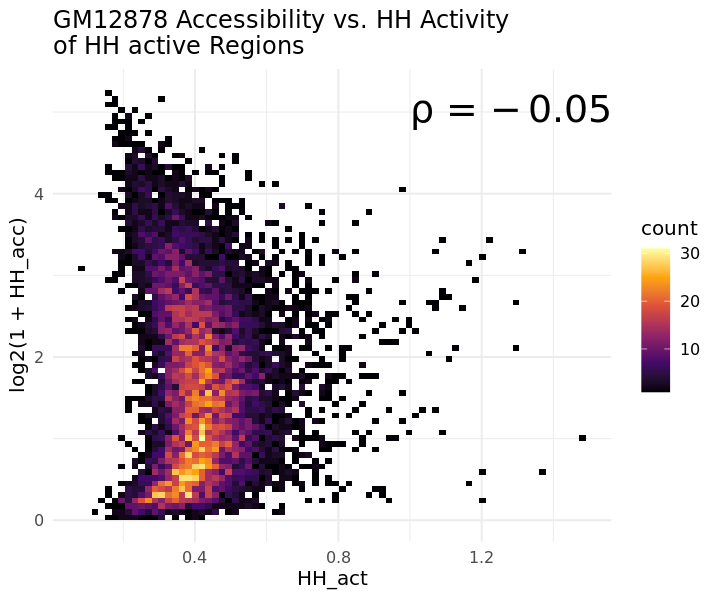

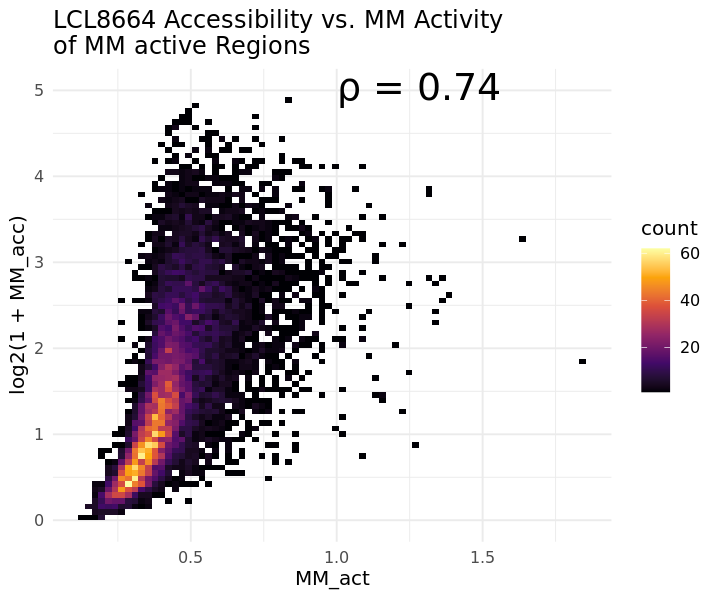

In [3]:
options(repr.plot.width = 6, repr.plot.height = 5)
#plot as scatter plots and calculate correlation

p_h <- ggplot(h, aes(x = HH_act, y = log2(1+HH_acc))) +
        geom_bin_2d(bins = 75) +
        ggtitle("GM12878 Accessibility vs. HH Activity\nof HH active Regions") +
        theme_minimal(base_size = 12) +
        scale_fill_viridis_c(option = "inferno") +
        ggpubr::stat_cor(method = "spearman", label.x = 1, label.y = 5, 
                         cor.coef.name = "rho", aes(label = ..r.label..), 
                         size = 8)
p_h

p_m <- ggplot(m, aes(x = MM_act, y = log2(1+MM_acc))) +
        geom_bin_2d(bins = 75) +
        ggtitle("LCL8664 Accessibility vs. MM Activity\nof MM active Regions") +
        theme_minimal(base_size = 12) +
        scale_fill_viridis_c(option = "inferno") +
        ggpubr::stat_cor(method = "spearman", label.x = 1, label.y = 5, 
                         cor.coef.name = "rho", aes(label = ..r.label..), 
                         size = 8)
p_m

In [15]:
#save as pdf
ggsave(p_h, filename = "/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/activity-vs-accessibility/HH_results_HH-regions.pdf", 
    device = cairo_pdf, heigh = 5, width = 6)

#save as pdf
ggsave(p_m, filename = "/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/activity-vs-accessibility/MM_results_MM-regions.pdf", 
    device = cairo_pdf, heigh = 5, width = 6)

Swap axeses

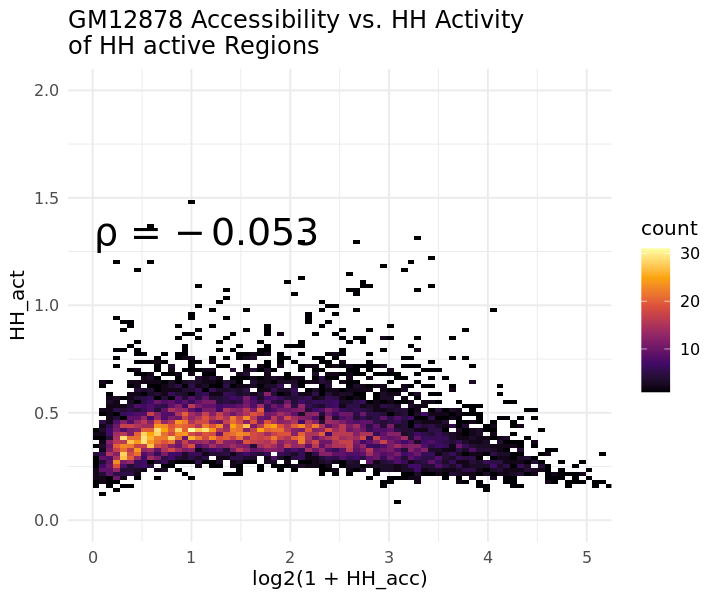

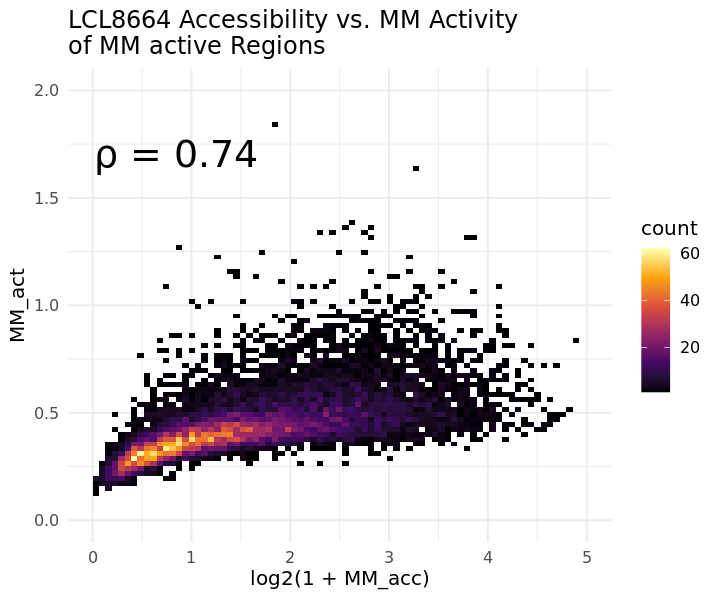

In [13]:
options(repr.plot.width = 6, repr.plot.height = 5)
#plot as scatter plots and calculate correlation

p_h <- ggplot(h, aes(y = HH_act, x = log2(1+HH_acc))) +
        geom_bin_2d(bins = 75) +
        ggtitle("GM12878 Accessibility vs. HH Activity\nof HH active Regions") +
        theme_minimal(base_size = 12) +
        scale_fill_viridis_c(option = "inferno") +
        ggpubr::stat_cor(method = "spearman", #label.x = 1, label.y = 5, 
                         cor.coef.name = "rho", aes(label = ..r.label..), 
                         size = 8) +
        coord_cartesian(xlim = c(0,5), ylim = c(0,2))
p_h

p_m <- ggplot(m, aes(y = MM_act, x = log2(1+MM_acc))) +
        geom_bin_2d(bins = 75) +
        ggtitle("LCL8664 Accessibility vs. MM Activity\nof MM active Regions") +
        theme_minimal(base_size = 12) +
        scale_fill_viridis_c(option = "inferno") +
        ggpubr::stat_cor(method = "spearman", #label.x = 1, label.y = 5, 
                         cor.coef.name = "rho", aes(label = ..r.label..), 
                         size = 8) +
        coord_cartesian(xlim = c(0,5), ylim = c(0,2))
p_m

Threshold by 1 and plot

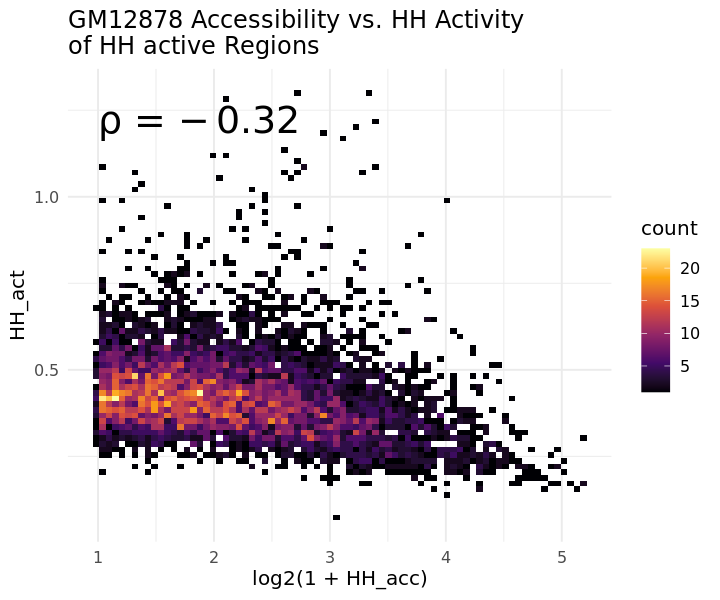

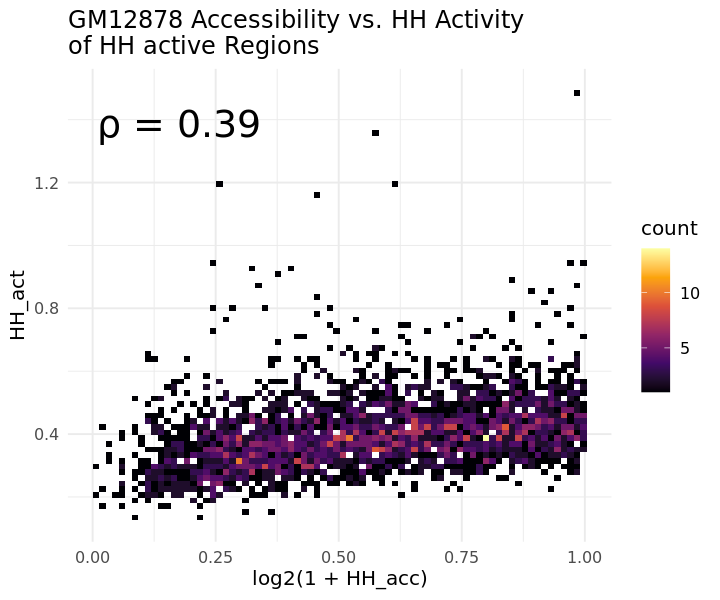

In [11]:
h_high <- filter(h, log2(1+HH_acc) >= 1)
h_low <- filter(h, log2(1+HH_acc) < 1)

options(repr.plot.width = 6, repr.plot.height = 5)
#plot as scatter plots and calculate correlation

p_high <- ggplot(h_high, aes(y = HH_act, x = log2(1+HH_acc))) +
        geom_bin_2d(bins = 75) +
        ggtitle("GM12878 Accessibility vs. HH Activity\nof HH active Regions") +
        theme_minimal(base_size = 12) +
        scale_fill_viridis_c(option = "inferno") +
        ggpubr::stat_cor(method = "spearman", #label.x = 1, label.y = 5, 
                         cor.coef.name = "rho", aes(label = ..r.label..), 
                         size = 8)
p_high

p_low <- ggplot(h_low, aes(y = HH_act, x = log2(1+HH_acc))) +
        geom_bin_2d(bins = 75) +
        ggtitle("GM12878 Accessibility vs. HH Activity\nof HH active Regions") +
        theme_minimal(base_size = 12) +
        scale_fill_viridis_c(option = "inferno") +
        ggpubr::stat_cor(method = "spearman", #label.x = 1, label.y = 5, 
                         cor.coef.name = "rho", aes(label = ..r.label..), 
                         size = 8)
p_low



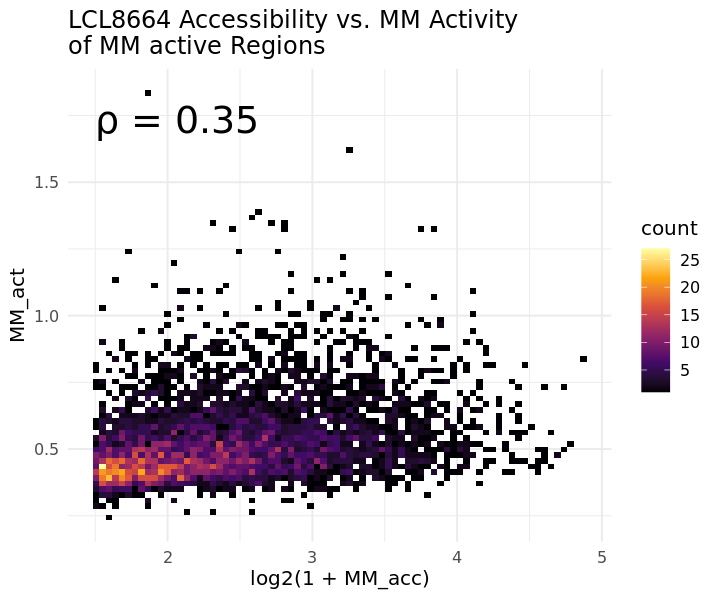

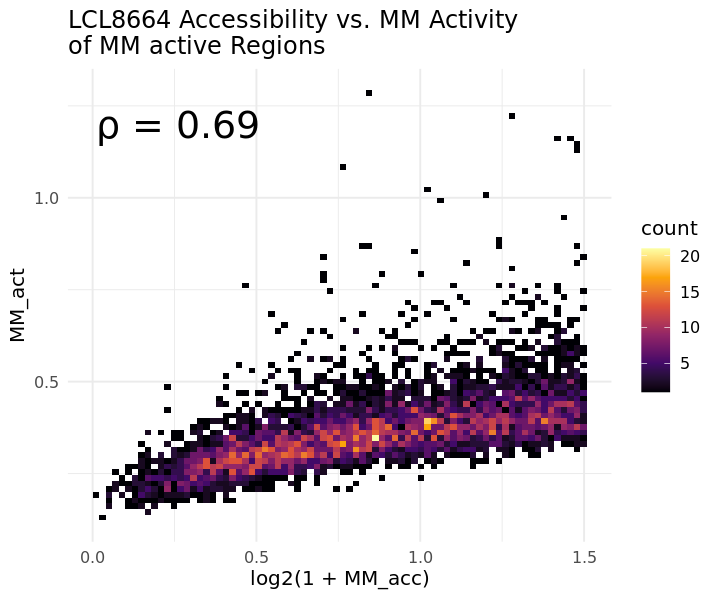

In [16]:
m_high <- filter(m, log2(1+MM_acc) >= 1.5)
m_low <- filter(m, log2(1+MM_acc) < 1.5)

options(repr.plot.width = 6, repr.plot.height = 5)
#plot as scatter plots and calculate correlation

p_high <- ggplot(m_high, aes(y = MM_act, x = log2(1+MM_acc))) +
        geom_bin_2d(bins = 75) +
        ggtitle("LCL8664 Accessibility vs. MM Activity\nof MM active Regions") +
        theme_minimal(base_size = 12) +
        scale_fill_viridis_c(option = "inferno") +
        ggpubr::stat_cor(method = "spearman", #label.x = 1, label.y = 5, 
                         cor.coef.name = "rho", aes(label = ..r.label..), 
                         size = 8)
p_high

p_low <- ggplot(m_low, aes(y = MM_act, x = log2(1+MM_acc))) +
        geom_bin_2d(bins = 75) +
        ggtitle("LCL8664 Accessibility vs. MM Activity\nof MM active Regions") +
        theme_minimal(base_size = 12) +
        scale_fill_viridis_c(option = "inferno") +
        ggpubr::stat_cor(method = "spearman", #label.x = 1, label.y = 5, 
                         cor.coef.name = "rho", aes(label = ..r.label..), 
                         size = 8)
p_low

Z score

In [4]:
h_z <- mutate(h, z_HH_act = (HH_act - mean(h$HH_act))/sd(h$HH_act), 
                 z_HH_acc = (HH_acc - mean(h$HH_acc))/sd(h$HH_acc))

m_z <- mutate(m, z_MM_act = (MM_act - mean(m$MM_act))/sd(m$MM_act), 
                 z_MM_acc = (MM_acc - mean(m$MM_acc))/sd(m$MM_acc))

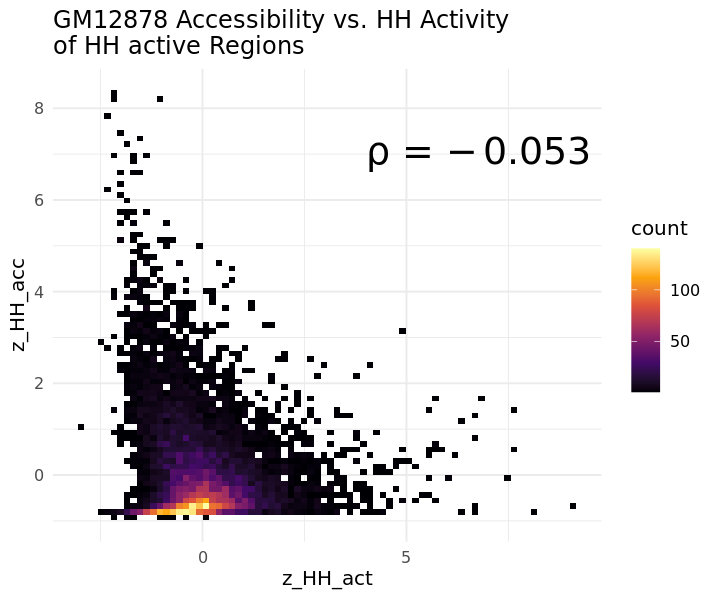

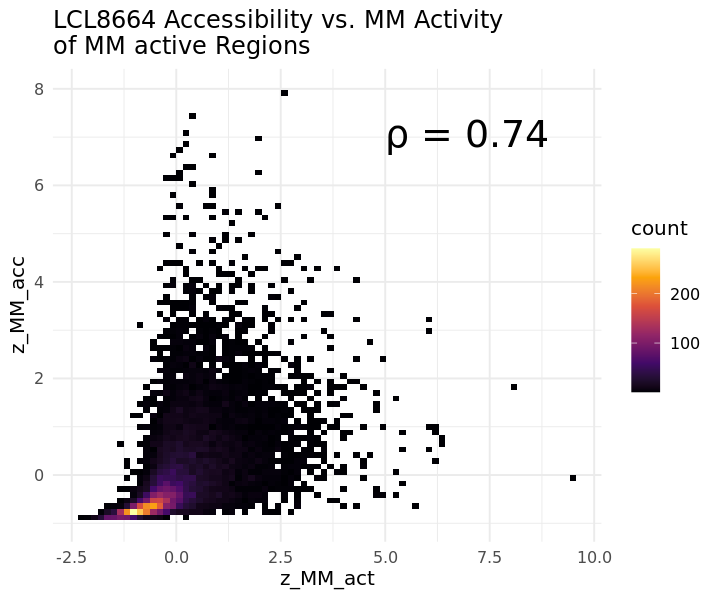

In [8]:
options(repr.plot.width = 6, repr.plot.height = 5)
#plot as scatter plots and calculate correlation

p_h_z <- ggplot(h_z, aes(x = z_HH_act, y = z_HH_acc)) +
        geom_bin_2d(bins = 75) +
        ggtitle("GM12878 Accessibility vs. HH Activity\nof HH active Regions") +
        theme_minimal(base_size = 12) +
        scale_fill_viridis_c(option = "inferno") +
        ggpubr::stat_cor(method = "spearman", label.x = 4, label.y = 7, 
                         cor.coef.name = "rho", aes(label = ..r.label..), 
                         size = 8)
p_h_z

p_m_z <- ggplot(m_z, aes(x = z_MM_act, y = z_MM_acc)) +
        geom_bin_2d(bins = 75) +
        ggtitle("LCL8664 Accessibility vs. MM Activity\nof MM active Regions") +
        theme_minimal(base_size = 12) +
        scale_fill_viridis_c(option = "inferno") +
        ggpubr::stat_cor(method = "spearman", label.x = 5, label.y = 7, 
                         cor.coef.name = "rho", aes(label = ..r.label..), 
                         size = 8)
p_m_z

## delta activity vs delta accessibility at diff active regions

### Get list of all regions and add ID for joining back later

In [1]:
HS=$(read-ini ../config.ini HH-VS-MM hh-active_mm-inactive)
MS=$(read-ini ../config.ini HH-VS-MM mm-active_hh-inactive)
CA=$(read-ini ../config.ini HH-VS-MM conserved_active)

OUT="/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/activity-vs-accessibility"

cat $HS $MS $CA | awk 'BEGIN{OFS="\t"}{print $1,$2,$3,"region_"NR}' - > ${OUT}/concatenated_diff_regions.bed

In [2]:
liftOver -bedPlus=3 ${OUT}/concatenated_diff_regions.bed \
    /data/hodges_lab/bin/map.chain/hg38ToRheMac10.over.chain.gz \
    ${OUT}/concatenated_diff_regions.rheMac10.bed ${OUT}/concatenated_diff_regions.unMapped.bed

Reading liftover chains
Mapping coordinates
wc: /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/activity-vs-accessibility/concatenated_regions.unMapped.bed: No such file or directory


: 1

In [3]:
#how many are unmapped?
wc -l ${OUT}/concatenated_diff_regions.unMapped.bed

0 /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/activity-vs-accessibility/concatenated_diff_regions.unMapped.bed


### Map merged accessibility and activity bigwigs to each region

In [4]:
#using deeptools multiBigwigSummary
#paths
#bed
OUT="/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/activity-vs-accessibility"
H_BED="${OUT}/concatenated_diff_regions.bed"
M_BED="${OUT}/concatenated_diff_regions.rheMac10.bed"

#Acc signal
H_acc='/data/hodges_lab/ATAC-STARR_B-cells/results/chrAcc_signal_files/GM12878inGM12878_DNA_no-dup.bw'
M_acc='/data/hodges_lab/ATAC-STARR_B-cells/results/chrAcc_signal_files/LCL8664inLCL8664_DNA_no-dup.bw'

#Act signal
HH_act=$(read-ini ../config.ini ACTIVITY_BW hh_merged)
M_dir=$(read-ini ../config.ini ACTIVITY_BW dir)
MM_act="${M_dir}/LCL8664inLCL8664_merged_RNA-to-DNA_log2.filtered.bw"

#Output
OUT_DIR="/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/activity-vs-accessibility"

#human genome
multiBigwigSummary BED-file -b $H_acc $HH_act -p 4 -o ${OUT_DIR}/delta_hg38_results.npz \
    --outRawCounts ${OUT_DIR}/delta_hg38_cts.tsv --BED $H_BED

#macaque genome
multiBigwigSummary BED-file -b $M_acc $MM_act -p 4 -o ${OUT_DIR}/delta_rheMac10_results.npz \
    --outRawCounts ${OUT_DIR}/delta_rheMac10_cts.tsv --BED $M_BED

Number of bins found: 16897

The following chromosome names did not match between the bigwig files
chromosome	length
chrUn_NW_021160642v1	     20482
chrUn_NW_021160599v1	     19589
chrUn_NW_021161644v1	     62222
chrUn_NW_021161735v1	      5068
chrUn_NW_021162903v1	     14158
chrUn_NW_021162347v1	      2647
chrUn_NW_021161068v1	     29118
chrUn_NW_021161416v1	     39862
chrUn_NW_021161158v1	     31109
chr2_NW_021160115v1_random	     30586
chrUn_NW_021160515v1	     17912
chrUn_NW_021162756v1	     12067
chrUn_NW_021162441v1	      5231
chrUn_NW_021162776v1	     12314
chrUn_NW_021162071v1	     91746
chrUn_NW_021162589v1	      8393
chrUn_NW_021161305v1	     36069
chrUn_NW_021161850v1	   1117261
chrUn_NW_021161593v1	     46534
chrUn_NW_021162838v1	     13172
chrUn_NW_021161765v1	     58172
chrUn_NW_021161864v1	     66982
chrUn_NW_021162550v1	      8619
chrUn_NW_021160771v1	     23071
chr5_NW_021160174v1_random	    103593
chrUn_NW_021160906v1	     25392
chrUn_NW_021161978v1	     81117
chrUn_N

chrUn_NW_021161154v1	     31995
chrUn_NW_021160427v1	     13224
chrUn_NW_021162275v1	       965
chrUn_NW_021162072v1	    103309
chrUn_NW_021160978v1	     27325
chrUn_NW_021160579v1	     19182
chrUn_NW_021162645v1	      9924
chrUn_NW_021160677v1	     20886
chrUn_NW_021160938v1	     26233
chrUn_NW_021160937v1	     26160
chrUn_NW_021162095v1	    113870
chr9_NW_021160233v1_random	     64642
chrUn_NW_021161668v1	     51783
chrUn_NW_021161712v1	     37542
chrUn_NW_021161452v1	     40959
chrUn_NW_021162340v1	      5916
chrUn_NW_021162895v1	     13238
chrUn_NW_021162207v1	    237673
chrUn_NW_021162951v1	     14818
chrUn_NW_021160715v1	     21490
chrUn_NW_021161233v1	     34057
chrUn_NW_021160416v1	     16444
chrUn_NW_021160881v1	     25113
chrUn_NW_021161958v1	     78533
chrUn_NW_021162174v1	    183966
chrUn_NW_021160811v1	     23453
chrUn_NW_021161128v1	     10913
chrUn_NW_021161363v1	     37735
chrUn_NW_021160903v1	     26486
chrUn_NW_021161184v1	     29553
chrUn_NW_021160824v1	     23823
ch

chrUn_NW_021162586v1	      9265
chr16_NW_021160319v1_random	     43437
chrUn_NW_021162059v1	     98273
chrUn_NW_021160559v1	     18851
chrUn_NW_021161884v1	     67631
chr15_NW_021160305v1_random	     40306
chrUn_NW_021162331v1	      5815
chrUn_NW_021162818v1	     12883
chrUn_NW_021161347v1	      3833
chrUn_NW_021162019v1	     88765
chrUn_NW_021162144v1	    110746
chr5_NW_021160163v1_random	     29791
chrUn_NW_021161857v1	     66348
chrUn_NW_021162819v1	     12752
chrUn_NW_021160449v1	     16960
chr11_NW_021160256v1_random	     30974
chrUn_NW_021162026v1	      5576
chrUn_NW_021161356v1	     37427
chrUn_NW_021162346v1	      6035
chrUn_NW_021160931v1	     26222
chrUn_NW_021160435v1	     16370
chrUn_NW_021160543v1	     18158
chrUn_NW_021160706v1	     21593
chrUn_NW_021162258v1	     15233
chr8_NW_021160222v1_random	     76376
chrUn_NW_021162004v1	     28395
chrUn_NW_021162086v1	    110440
chrUn_NW_021161147v1	     31685
chrUn_NW_021162055v1	     99493
chrUn_NW_021162310v1	      2713
chrUn_N

chrUn_NW_021162427v1	      4610
chrUn_NW_021161334v1	     35341
chrUn_NW_021162660v1	     10498
chrUn_NW_021162041v1	     79615
chr9_NW_021160228v1_random	     47833
chrUn_NW_021161107v1	     30769
chrUn_NW_021161990v1	     82558
chrUn_NW_021162451v1	      5481
chrUn_NW_021162405v1	      6880
chrUn_NW_021161991v1	     83025
chrUn_NW_021161200v1	     32957
chrUn_NW_021160417v1	     56609
chrUn_NW_021161598v1	     47063
chrUn_NW_021160452v1	     16930
chrUn_NW_021161120v1	     30924
chrUn_NW_021162429v1	      7250
chrUn_NW_021161196v1	     32911
chrUn_NW_021161459v1	     41493
chrUn_NW_021162688v1	     10707
chrUn_NW_021161443v1	     39583
chrUn_NW_021161872v1	     66898
chrUn_NW_021161175v1	     32630
chrUn_NW_021162599v1	      9375
chrUn_NW_021161976v1	      5579
chrUn_NW_021162230v1	    325236
chrUn_NW_021161945v1	     76568
chrUn_NW_021161262v1	     26739
chrUn_NW_021161292v1	     35701
chrUn_NW_021161815v1	     61255
chrUn_NW_021162685v1	     10782
chrUn_NW_021160975v1	     27350
ch

chrUn_NW_021161167v1	     29258
chrUn_NW_021160555v1	     18898
chrUn_NW_021160645v1	     20467
chrUn_NW_021160898v1	     25232
chrUn_NW_021160901v1	     25530
chrUn_NW_021161858v1	     66616
chrUn_NW_021160669v1	     20668
chr19_NW_021160370v1_random	     89493
chrUn_NW_021161077v1	     29849
chrUn_NW_021162779v1	     12101
chrUn_NW_021160454v1	     16782
chrUn_NW_021162049v1	     96414
chrUn_NW_021160825v1	     23843
chrUn_NW_021162199v1	    219402
chrUn_NW_021162555v1	      8736
chrUn_NW_021160893v1	     32501
chrUn_NW_021162976v1	      8909
chrUn_NW_021162076v1	    105857
chrUn_NW_021162436v1	      5208
chrUn_NW_021162003v1	     75760
chrUn_NW_021160459v1	     16975
chrUn_NW_021162809v1	     12649
chrUn_NW_021162687v1	     10847
chrUn_NW_021162074v1	    104524
chrUn_NW_021162538v1	      7384
chrUn_NW_021162068v1	     97056
chrUn_NW_021161179v1	     32583
chrUn_NW_021162699v1	     11107
chrUn_NW_021160673v1	     20657
chrUn_NW_021161032v1	     28691
chrUn_NW_021160511v1	     18023
c

chrUn_NW_021162113v1	    111075
chrUn_NW_021161521v1	     43807
chrUn_NW_021161273v1	     35291
chrUn_NW_021160568v1	     18522
chrUn_NW_021162424v1	      7232
chrUn_NW_021160614v1	     19863
chr17_NW_021160337v1_random	     43610
chrUn_NW_021161183v1	     32827
chrUn_NW_021162647v1	     10228
chrUn_NW_021160638v1	     20150
chrUn_NW_021161654v1	     45730
chr9_NW_021160237v1_random	     85724
chrUn_NW_021162413v1	      4248
chrUn_NW_021162428v1	      4932
chrUn_NW_021160587v1	     19229
chrUn_NW_021161385v1	     38848
chrUn_NW_021161818v1	     58033
chrUn_NW_021162937v1	     14564
chr19_NW_021160366v1_random	     71257
chrUn_NW_021161170v1	     32431
chrUn_NW_021162676v1	     10686
chrUn_NW_021161396v1	     39087
chrUn_NW_021163004v1	     15959
chrUn_NW_021160615v1	     19786
chrUn_NW_021160569v1	     19175
chrUn_NW_021162393v1	      4331
chrUn_NW_021160855v1	     24805
chrUn_NW_021161649v1	      4723
chrUn_NW_021160844v1	     24299
chrUn_NW_021161885v1	     69004
chr9_NW_021160229v1_

chrUn_NW_021162786v1	     12614
chrUn_NW_021160634v1	     20187
chrUn_NW_021162201v1	       421
chrUn_NW_021161296v1	     11407
chrUn_NW_021162221v1	    262286
chr6_NW_021160179v1_random	     38876
chrUn_NW_021161376v1	     38735
chrUn_NW_021161406v1	     38736
chrUn_NW_021160604v1	     19279
chrUn_NW_021161325v1	     37073
chrUn_NW_021161874v1	     66457
chrUn_NW_021162981v1	     15306
chrUn_NW_021162705v1	     11275
chrUn_NW_021160657v1	     20246
chrUn_NW_021162362v1	      3293
chrUn_NW_021162998v1	     33825
chrUn_NW_021161985v1	     82149
chrUn_NW_021162929v1	     14570
chrUn_NW_021161587v1	      4480
chrUn_NW_021161790v1	     60347
chrUn_NW_021162610v1	      9422
chrUn_NW_021162878v1	     13801
chrUn_NW_021161042v1	     28932
chr1_NW_021160104v1_random	     35879
chrUn_NW_021161397v1	     39340
chrUn_NW_021160537v1	     18435
chrUn_NW_021162146v1	    144953
chrUn_NW_021161841v1	     69994
chrUn_NW_021160659v1	     20534
chrUn_NW_021161490v1	     42397
chrUn_NW_021162480v1	      7

chrUn_NW_021162942v1	     14675
chrUn_NW_021160436v1	     16749
chrUn_NW_021161291v1	     35380
chrUn_NW_021160963v1	     26895
chrUn_NW_021162814v1	     12398
chrUn_NW_021162732v1	     11620
chr19_NW_021160364v1_random	     61817
chrUn_NW_021162581v1	      9107
chrUn_NW_021161519v1	     43859
chrUn_NW_021160527v1	     18335
chrUn_NW_021162188v1	    203441
chrUn_NW_021160631v1	     20077
chrUn_NW_021161866v1	     66938
chrUn_NW_021161310v1	     44556
chrUn_NW_021161114v1	     30849
chrUn_NW_021162522v1	      8268
chrUn_NW_021162453v1	      7387
chrUn_NW_021162588v1	      8300
chrUn_NW_021160698v1	     21211
chr11_NW_021160259v1_random	     36993
chrUn_NW_021162626v1	      9820
chrUn_NW_021160761v1	     22427
chrUn_NW_021161340v1	     36764
chrUn_NW_021161642v1	     49762
chrUn_NW_021162374v1	      6242
chr20_NW_021160379v1_random	     36919
chrUn_NW_021162916v1	     14549
chrUn_NW_021160546v1	     18667
chrUn_NW_021160845v1	     24216
chrUn_NW_021161461v1	     34683
chrUn_NW_021162190v

chrUn_NW_021162621v1	      9770
chrUn_NW_021161739v1	     55173
chr14_NW_021160299v1_random	     29900
chrUn_NW_021161882v1	     98409
chr2_NW_021160122v1_random	     92040
chrUn_NW_021160797v1	     22924
chrUn_NW_021162785v1	     12533
chrUn_NW_021162977v1	     15493
chrUn_NW_021161867v1	     66923
chr6_NW_021160184v1_random	     61300
chrUn_NW_021161127v1	     30445
chrUn_NW_021162811v1	     12690
chrUn_NW_021160984v1	     16890
chrUn_NW_021162950v1	     14950
chrUn_NW_021161014v1	      2116
chrUn_NW_021160588v1	     19321
chrUn_NW_021161424v1	     40176
chrUn_NW_021161949v1	     77073
chrUn_NW_021160710v1	     21606
chrUn_NW_021162862v1	     13579
chr15_NW_021160309v1_random	     53926
chrUn_NW_021160788v1	     22922
chrUn_NW_021160987v1	     27365
chrUn_NW_021161873v1	     66432
chrUn_NW_021162746v1	     11763
chrUn_NW_021161776v1	     57200
chrUn_NW_021162528v1	      8237
chrUn_NW_021161625v1	     48530
chrUn_NW_021161962v1	     79904
chrUn_NW_021162387v1	      6386
chrUn_NW_02116

chrUn_NW_021160879v1	     25199
chrUn_NW_021160679v1	     20860
chrUn_NW_021160516v1	     17825
chrUn_NW_021162222v1	     37855
chrUn_NW_021161756v1	     57072
chrUn_NW_021161317v1	     36440
chrUn_NW_021162598v1	      9314
chrUn_NW_021162260v1	      1182
chrUn_NW_021161538v1	     43892
chrUn_NW_021160544v1	     18591
chrUn_NW_021162363v1	      3439
chrUn_NW_021160571v1	     18966
chrUn_NW_021161570v1	     45239
chrUn_NW_021162857v1	     21541
chrUn_NW_021161464v1	     41089
chrUn_NW_021162478v1	      5894
chrUn_NW_021161269v1	     35097
chrUn_NW_021162531v1	      8426
chr5_NW_021160167v1_random	     37838
chrUn_NW_021162251v1	     71418
chrUn_NW_021161295v1	      9582
chrUn_NW_021162358v1	      6258
chrUn_NW_021161288v1	     35635
chrUn_NW_021162730v1	     11709
chrUn_NW_021160877v1	     25176
chrUn_NW_021162536v1	      8472
chrUn_NW_021162541v1	      8526
chrUn_NW_021160518v1	     17844
chrUn_NW_021161574v1	     45412
chr7_NW_021160198v1_random	     53832
chrUn_NW_021161456v1	      4

chrUn_NW_021161201v1	     33207
chr14_NW_021160284v1_random	     34793
chrUn_NW_021161528v1	     29635
chrUn_NW_021161364v1	     38187
chrUn_NW_021161773v1	     57948
chrUn_NW_021162065v1	     99708
chrUn_NW_021161337v1	     37193
chrUn_NW_021162657v1	      9439
chrUn_NW_021162703v1	     11059
chrUn_NW_021162788v1	     12524
chr4_NW_021160153v1_random	     52252
chrUn_NW_021162769v1	     35003
chrUn_NW_021160596v1	     18714
chr3_NW_021160130v1_random	     29788
chrUn_NW_021162696v1	     11007
chrUn_NW_021162836v1	     13199
chrUn_NW_021161606v1	      4596
chrUn_NW_021161931v1	     75571
chrUn_NW_021161576v1	     49015
chr8_NW_021160211v1_random	    133312
chrUn_NW_021162727v1	     11708
chr3_NW_021160143v1_random	     30503
chrUn_NW_021161041v1	     28505
chrUn_NW_021162404v1	      6897
chrUn_NW_021160772v1	     22676
chrUn_NW_021162825v1	     12987
chrUn_NW_021162875v1	     13134
chrUn_NW_021161500v1	     43031
chrUn_NW_021161392v1	     39117
chrUn_NW_021162957v1	     15028
chrUn_NW_

chrUn_NW_021160483v1	     29983
chrUn_NW_021161272v1	     35294
chrUn_NW_021162466v1	      5643
chr19_NW_021160375v1_random	    183828
chrUn_NW_021160478v1	     17197
chr11_NW_021160257v1_random	     34094
chrUn_NW_021161180v1	     32752
chrUn_NW_021161594v1	     35042
chrUn_NW_021161263v1	     34834
chrUn_NW_021160993v1	     26903
chrUn_NW_021162160v1	    165522
chrUn_NW_021162742v1	     11212
chrUn_NW_021162106v1	    121230
chrUn_NW_021160908v1	     25719
chr13_NW_021160279v1_random	     65990
chrUn_NW_021161065v1	     29740
chrUn_NW_021161876v1	     68280
chrUn_NW_021160664v1	     20658
chrUn_NW_021160630v1	     20090
chr14_NW_021160291v1_random	     45281
chrUn_NW_021162270v1	     20182
chrUn_NW_021160749v1	     41788
chr4_NW_021160161v1_random	    738392
chrUn_NW_021162863v1	     13572
chr10_NW_021160254v1_random	     31739
chrUn_NW_021160577v1	     18466
chrUn_NW_021162382v1	      6395
chrUn_NW_021162920v1	     14508
chrUn_NW_021161658v1	      4699
chrUn_NW_021162494v1	      8009

### Read in results into R

In [1]:
suppressPackageStartupMessages(library(tidyverse))
ini <- ini::read.ini("../config.ini")

In [2]:
#read in results:
dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/activity-vs-accessibility'
h <- read_tsv(paste0(dir, '/delta_hg38_cts.tsv'), 
              col_names = c("chr", "start", "end", "HH_acc", "HH_act"), skip = 1, show_col_types = FALSE)
m <- read_tsv(paste0(dir, '/delta_rheMac10_cts.tsv'), 
              col_names = c("chr", "start", "end", "MM_acc", "MM_act"), skip = 1, show_col_types = FALSE)

#read in regions for joining
hg38_ids <- read_tsv(paste0(dir, '/concatenated_diff_regions.bed'),
                col_names = c("chr", "start", "end", "region_id"), show_col_types = FALSE)

rheMac10_ids <- read_tsv(paste0(dir, '/concatenated_diff_regions.rheMac10.bed'),
                col_names = c("chr", "start", "end", "region_id"), show_col_types = FALSE)

In [3]:
#join hg38_ids and h
h_1 <- inner_join(hg38_ids, h, by = c("chr", "start", "end"))

#join rheMac10_ids and m
m_1 <- inner_join(rheMac10_ids, m, by = c("chr", "start", "end"))

#join h_1 and m_1 by region_id, keep hg38 coordinates
h_m <- inner_join(h_1, m_1, by = "region_id", suffix = c("_hg38", "_rheMac10"))

### Assign regions

In [4]:
# read in beds to assign regions.
cons_act <- read_tsv(ini$`HH-VS-MM`$conserved_active, 
                     col_names = c("chr", "start", "end"), 
                     show_col_types = FALSE)

hs <- read_tsv(ini$`HH-VS-MM`$`hh-active_mm-inactive`, 
                     col_names = c("chr", "start", "end"), 
                     show_col_types = FALSE)

ms <- read_tsv(ini$`HH-VS-MM`$`mm-active_hh-inactive`, 
                     col_names = c("chr", "start", "end"), 
                     show_col_types = FALSE)

In [9]:
#left join to add results to regions
cons_act_res <- left_join(cons_act, h_m, by = c("chr" = "chr_hg38", "start" = "start_hg38", "end" = "end_hg38"))
hs_res <- left_join(hs, h_m, by = c("chr" = "chr_hg38", "start" = "start_hg38", "end" = "end_hg38"))
ms_res <- left_join(ms, h_m, by = c("chr" = "chr_hg38", "start" = "start_hg38", "end" = "end_hg38"))

In [10]:
#check that it worked
nrow(cons_act_res)
nrow(hs_res)
nrow(ms_res)

[1] 3034

[1] 6922

[1] 6941

### plot delta values as scatter plots and calculate correlation

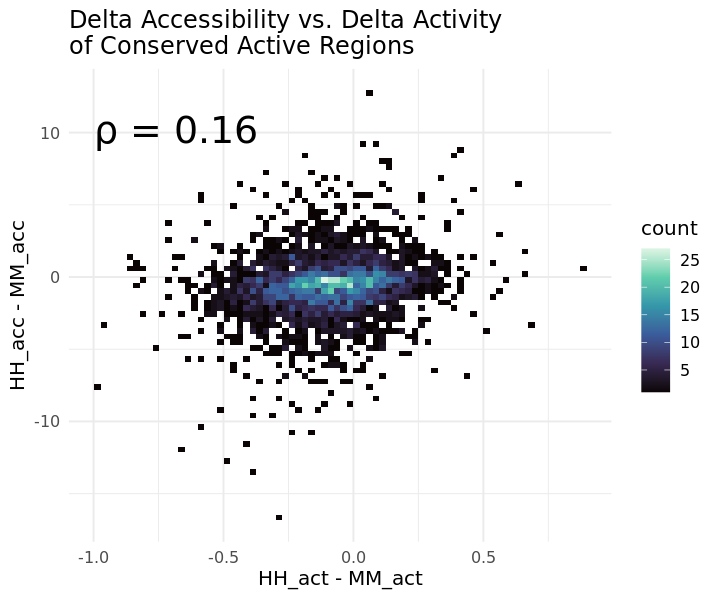

In [23]:
options(repr.plot.width = 6, repr.plot.height = 5)

p_1 <- ggplot(cons_act_res, aes(x = HH_act-MM_act, y = HH_acc-MM_acc)) +
        geom_bin_2d(bins = 75) +
        ggtitle("Delta Accessibility vs. Delta Activity\nof Conserved Active Regions") +
        theme_minimal(base_size = 12) +
        scale_fill_viridis_c(option = "mako") +
        ggpubr::stat_cor(method = "spearman", label.x = -1, label.y = 10, 
                         cor.coef.name = "rho", aes(label = ..r.label..), 
                         size = 8)
p_1

Warning message:
“Removed 2 rows containing non-finite values (stat_bin2d).”
Warning message:
“Removed 2 rows containing non-finite values (stat_cor).”


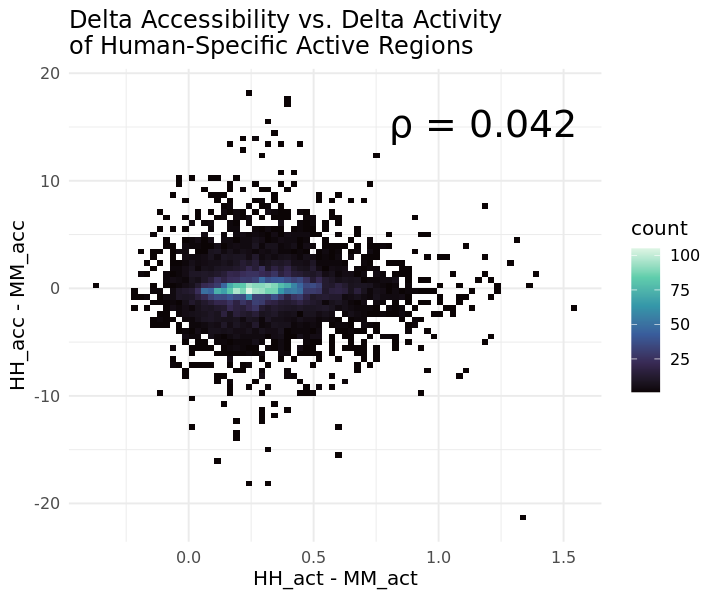

In [24]:
p_2 <- ggplot(hs_res, aes(x = HH_act-MM_act, y = HH_acc-MM_acc)) +
        geom_bin_2d(bins = 75) +
        ggtitle("Delta Accessibility vs. Delta Activity\nof Human-Specific Active Regions") +
        theme_minimal(base_size = 12) +
        scale_fill_viridis_c(option = "mako") +
        ggpubr::stat_cor(method = "spearman", label.x = 0.8, label.y = 15, 
                         cor.coef.name = "rho", aes(label = ..r.label..), 
                         size = 8)
p_2

Warning message:
“Removed 1 rows containing non-finite values (stat_bin2d).”
Warning message:
“Removed 1 rows containing non-finite values (stat_cor).”


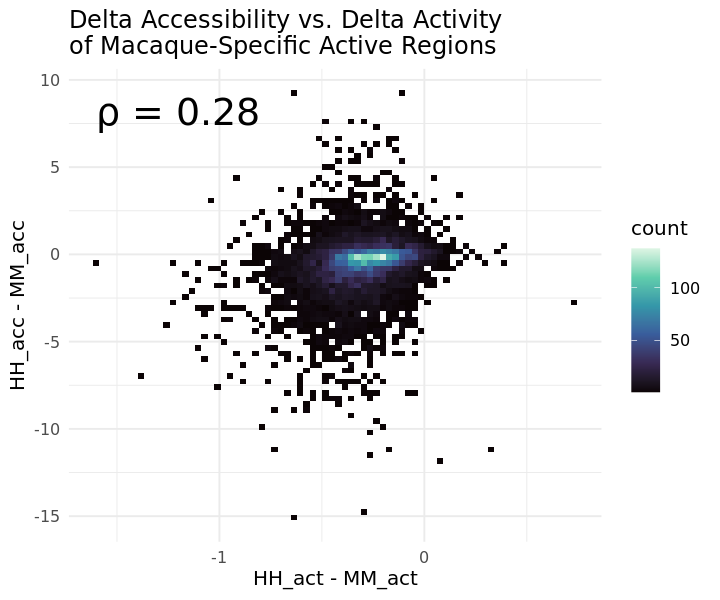

In [25]:
p_3 <- ggplot(ms_res, aes(x = HH_act-MM_act, y = HH_acc-MM_acc)) +
        geom_bin_2d(bins = 75) +
        ggtitle("Delta Accessibility vs. Delta Activity\nof Macaque-Specific Active Regions") +
        theme_minimal(base_size = 12) +
        scale_fill_viridis_c(option = "mako") +
        ggpubr::stat_cor(method = "spearman", label.x = -1.6, label.y = 8, 
                         cor.coef.name = "rho", aes(label = ..r.label..), 
                         size = 8)
p_3

In [26]:
#save as pdf
ggsave(p_1, filename = paste0(dir,"/delta_cons-act.pdf"), 
    device = cairo_pdf, heigh = 5, width = 6)

ggsave(p_2, filename = paste0(dir,"/delta_human-specific.pdf"), 
    device = cairo_pdf, heigh = 5, width = 6)

ggsave(p_3, filename = paste0(dir,"/delta_macaque-specific.pdf"), 
    device = cairo_pdf, heigh = 5, width = 6)

Warning message:
“Removed 2 rows containing non-finite values (stat_bin2d).”
Warning message:
“Removed 2 rows containing non-finite values (stat_cor).”
Warning message:
“Removed 1 rows containing non-finite values (stat_bin2d).”
Warning message:
“Removed 1 rows containing non-finite values (stat_cor).”


## Activity of most
The idea is that accessibility should not change over the various thresholds. 

In [1]:
ls /data/hodges_lab/ATAC-STARR_B-cells/data/hansen-fong/ATAC-STARR_bins/4_activity-filtered_bins/top_10K_regions/threshold_testing

cons_act.25k.bed		   GM12inGM11_active.regions.5k.bed
cons_act.50k.bed		   hh-specific.25k.bed
cons_act.5k.bed			   hh-specific.50k.bed
GG_active.bins.25k.bed		   hh-specific.5k.bed
GG_active.bins.50k.bed		   LG_active.bins.25k.bed
GG_active.bins.5k.bed		   LG_active.bins.50k.bed
GG_active.regions.25k.bed	   LG_active.bins.5k.bed
GG_active.regions.50k.bed	   LG_active.regions.25k.bed
GG_active.regions.5k.bed	   LG_active.regions.50k.bed
GL_active.bins.25k.bed		   LG_active.regions.5k.bed
GL_active.bins.50k.bed		   LL_active.bins.25k.bed
GL_active.bins.5k.bed		   LL_active.bins.50k.bed
GL_active.regions.25k.bed	   LL_active.bins.5k.bed
GL_active.regions.50k.bed	   LL_active.regions.25k.bed
GL_active.regions.5k.bed	   LL_active.regions.50k.bed
GM12inGM11_active.bins.20k.bed	   LL_active.regions.5k.bed
GM12inGM11_active.bins.25k.bed	   mm-specific.25k.bed
GM12inGM11_active.bins.5k.bed	   mm-specific.50k.bed
GM12inGM11_active.regions.20k.bed  mm-specific.5k.bed
GM12inGM11_active.regions.25